##Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the dataset
df = pd.read_csv('skin.csv')


In [ ]:
print("Dataset Shape:", df.shape)
print("Dataset Info:\n", df.info())
print("First Few Rows:\n", df.head())

Dataset Shape: (366, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history           

In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_s

In [ ]:
print("Target Class Distribution:\n", df['class'].value_counts())

Target Class Distribution:
 class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


In [ ]:
print("Column Names in Dataset:", df.columns)


Column Names in Dataset: Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')


In [ ]:

df.replace("?", np.nan, inplace=True)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [ ]:
# Split features and target
X = df.drop(columns=['class'])
y = df['class']

X.fillna(X.median(), inplace=True)

print(X.dtypes)


erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee_and_elbow_involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
PNL_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing_of_

In [ ]:
df.replace("Nan", np.nan, inplace=True)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

X = df.drop(columns=['class'])
y = df['class']

X.fillna(X.median(), inplace=True)

print(X.dtypes)


erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee_and_elbow_involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
PNL_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing_of_

In [ ]:
# Splitting features and target
X = df.drop(columns=['class'])
y = df['class']


X.fillna(X.median(), inplace=True)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)



Accuracy: 0.9727272727272728
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.94      0.89      0.91        18
           3       1.00      1.00      1.00        22
           4       0.88      0.93      0.90        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         6

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110

Confusion Matrix:
 [[34  0  0  0  0  0]
 [ 0 16  0  2  0  0]
 [ 0  0 22  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0  6]]


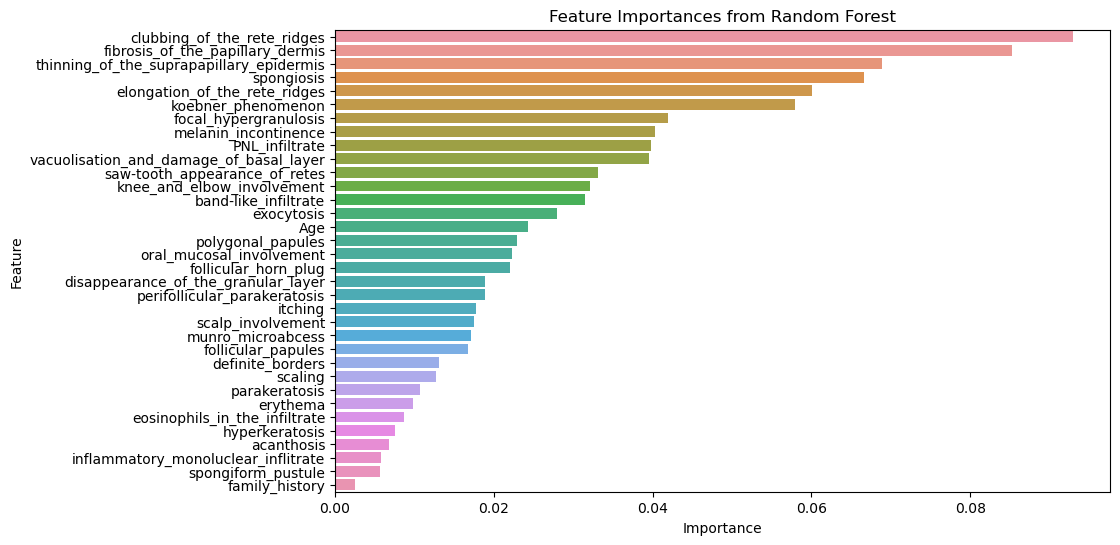

In [ ]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

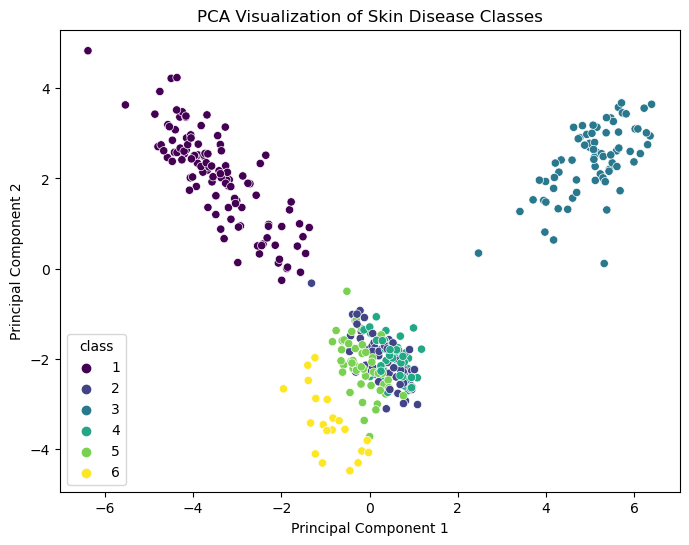

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA Visualization of Skin Disease Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



##svm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('dataset.csv')



In [ ]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [ ]:
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


In [ ]:
data.shape

(366, 35)

In [ ]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [ ]:
data.isnull().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [ ]:
# Define target and features
data['target'] = data['class']

In [ ]:
data = data.drop(columns=['class'])

In [ ]:
# Split features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

In [ ]:
X = X.replace('?', pd.NA) # Replace '?' with pd.NA
# Convert columns to numeric where possible, ignoring errors in other columns
for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col])
    except ValueError:
        pass  # Skip columns that cannot be converted to numeric

X = X.fillna(X.mean()) # Impute NaN with column means


In [ ]:
#  Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#  Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize SVM model
svm_model = SVC()

In [ ]:
# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}


In [ ]:
#  Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, ke

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [ ]:
# Get the best model
best_svm = grid_search.best_estimator_


In [ ]:
#  Make predictions on the test set
y_pred = best_svm.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.83      0.94      0.88        16
           3       1.00      1.00      1.00        19
           4       0.92      0.80      0.86        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         4

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.97      0.96      0.96       110

Confusion Matrix:
 [[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 19  0  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


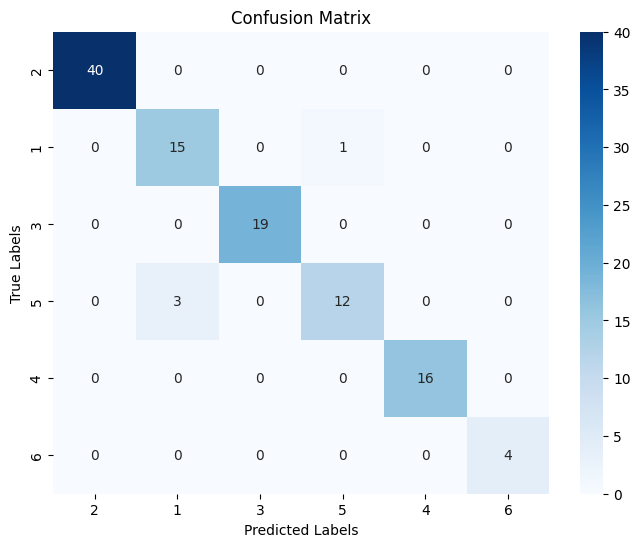

In [ ]:
#  Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##ADABOOST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
path= '/content/drive/MyDrive/Skin Disorder Prediction/dataset_35_dermatology (1).csv'

In [ ]:
df= pd.read_csv(path)

In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [ ]:
#We check for null values
df.isnull().sum()
#There are no missing values

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [ ]:
df.describe().T
#There are no constant features in this dataset

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Age,366,61,40,17


In [ ]:
#As Age is an object column, we need to convert it to an integer
#But we need to check its unique values
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 366 entries, 0 to 365
Series name: Age
Non-Null Count  Dtype
--------------  -----
366 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [ ]:
df.loc[df['Age']=='?']
#We will replace '?' by forwardfilling with 0
df['Age']=df['Age'].replace('?',0)

In [ ]:
df.Age.unique()
#Convert object column to integer
df['Age']=df['Age'].astype(int)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.00,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.00,2.0,2.0,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.00,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.00,1.0,2.0,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.00,0.0,1.0,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.00,0.0,0.0,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.00,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.00,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.00,0.0,1.0,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.00,0.0,1.0,3.0


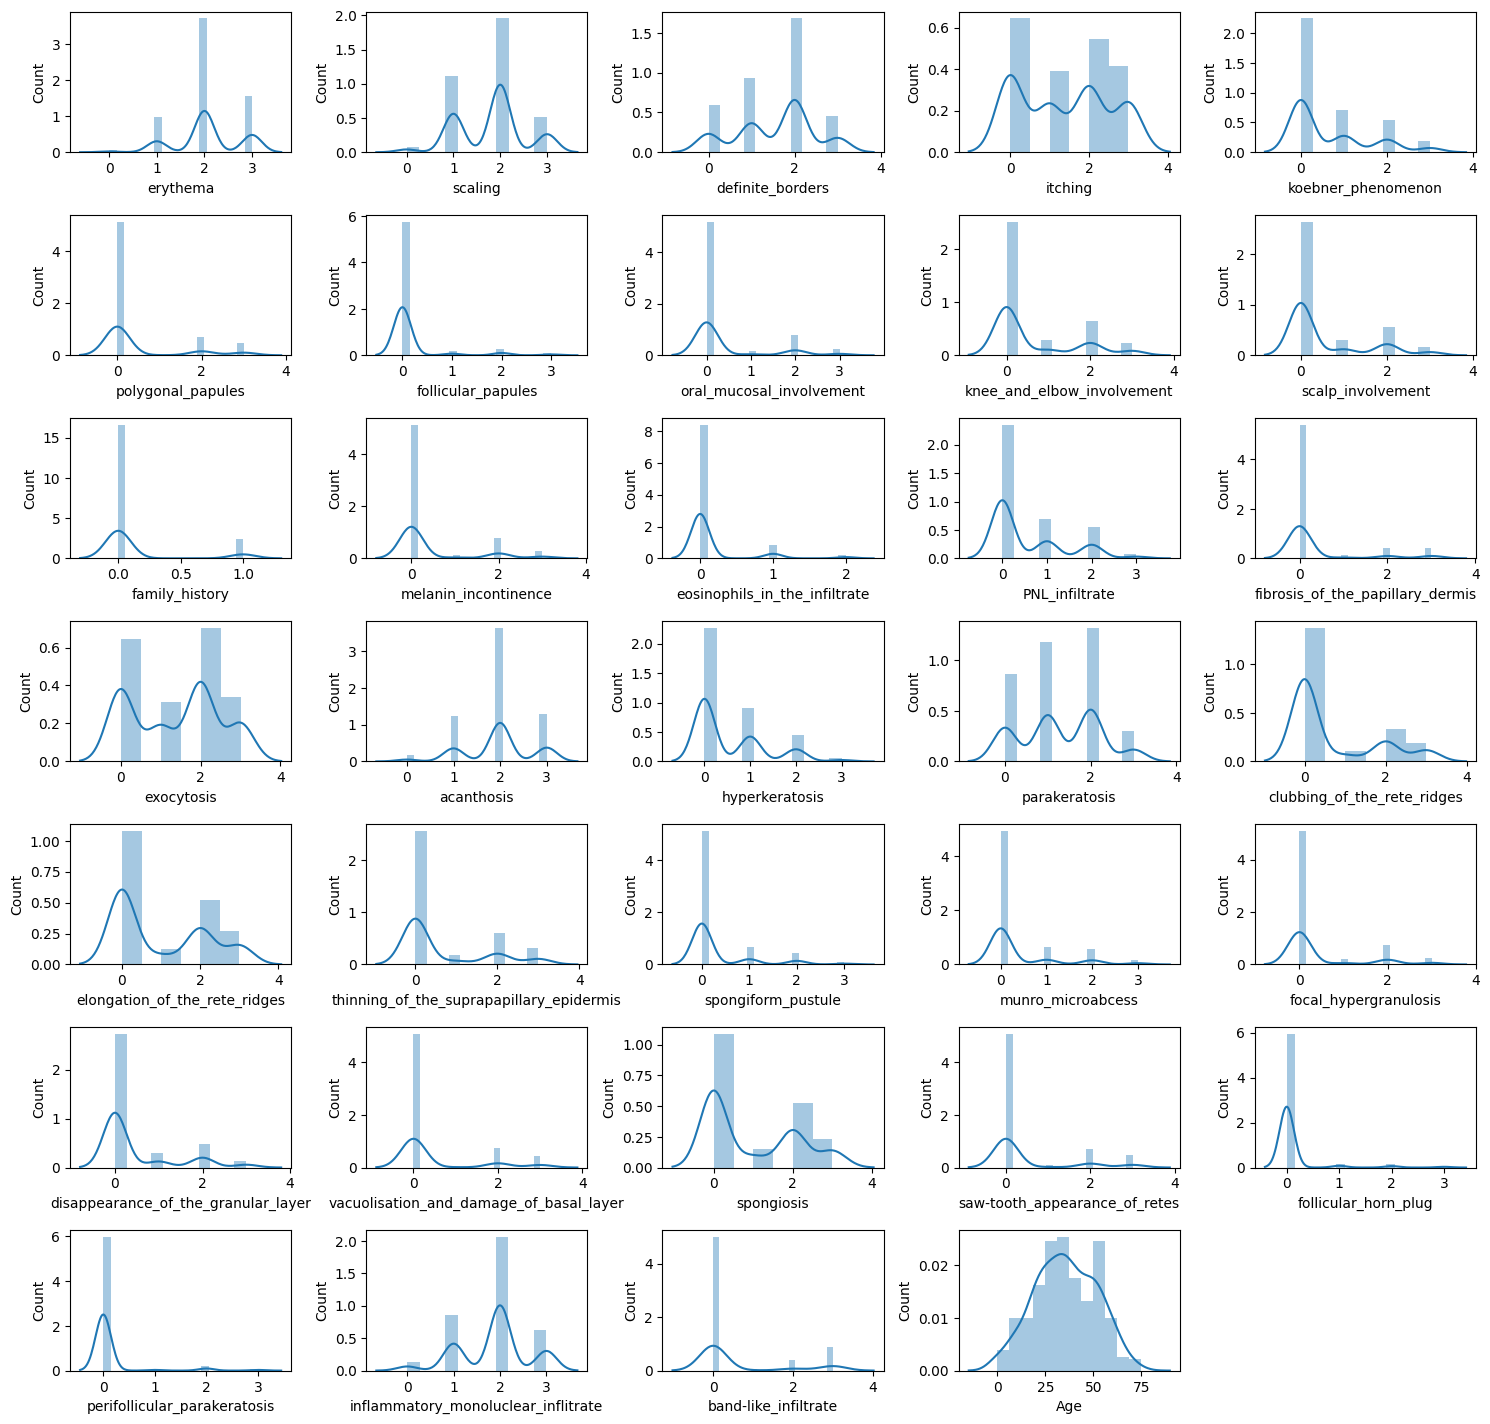

In [ ]:
#Features distribution with target variable
plt.figure(figsize=(15,20))
plotnumber=1
for column in df.columns:
  if plotnumber<=34:
    ax=plt.subplot(10,5,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Count',fontsize=10)
    plt.tight_layout()
  plotnumber+=1
plt.show()
#

<Axes: >

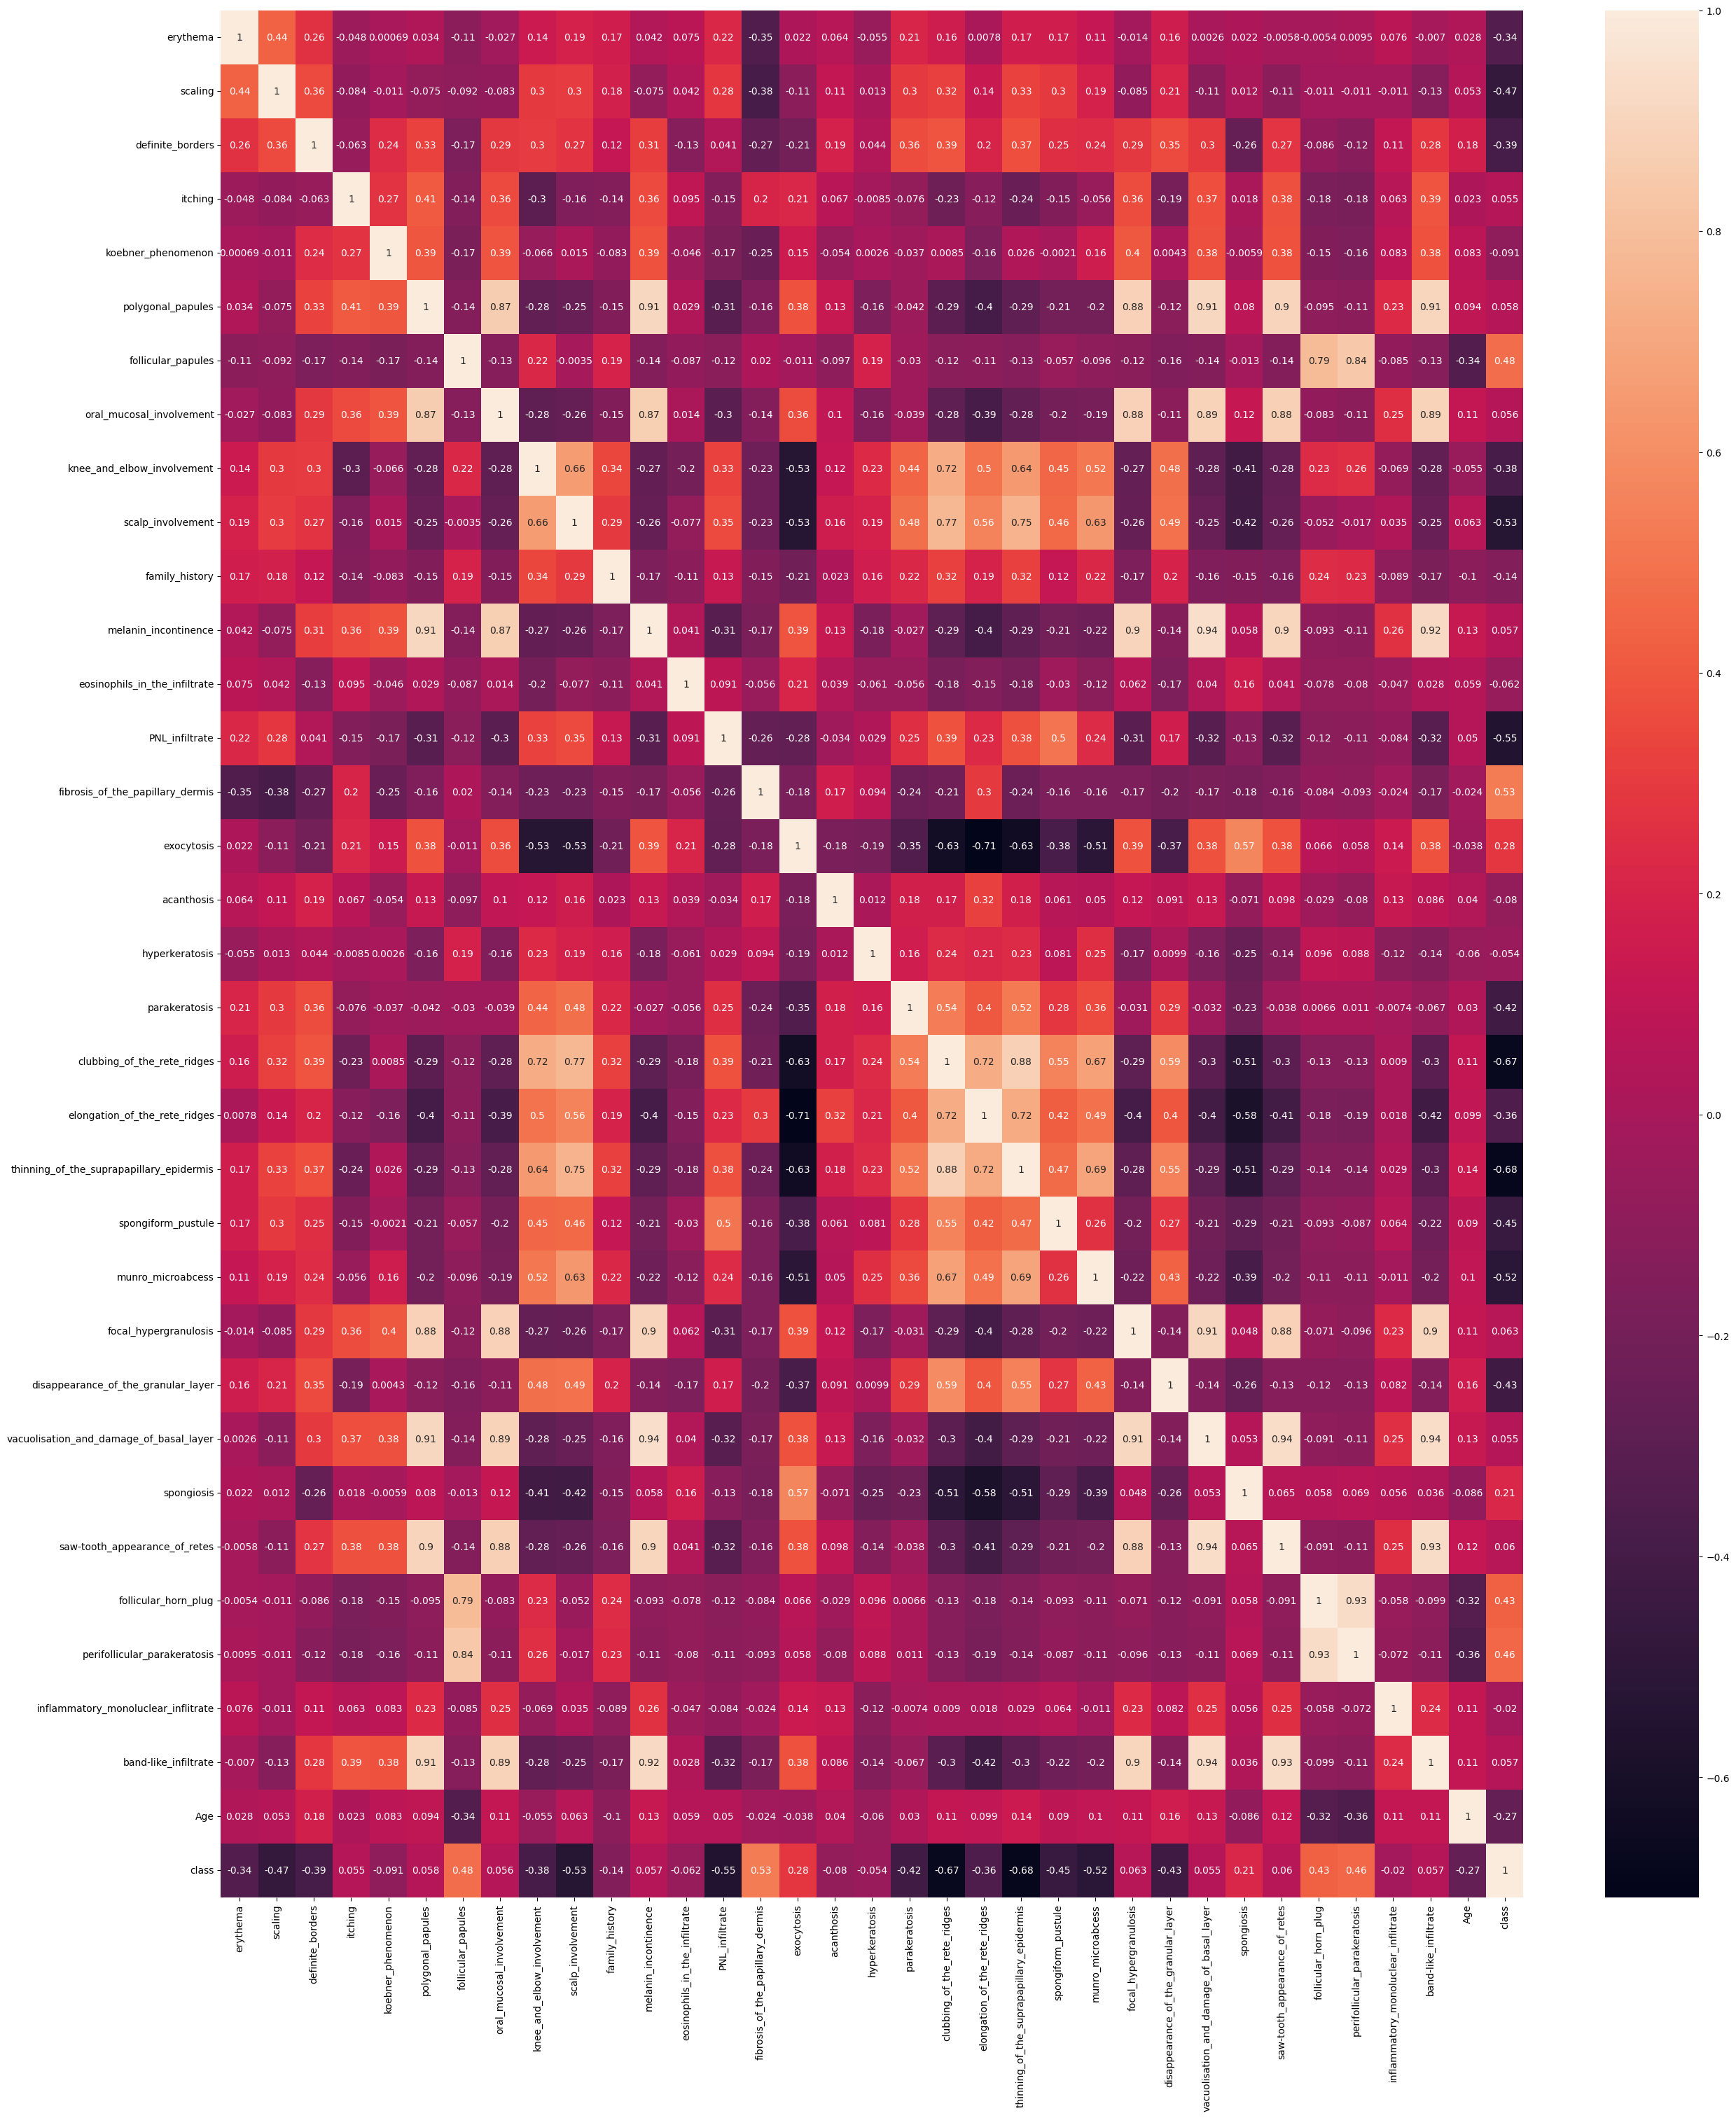

In [ ]:
#We need to find correlation
corr=df.corr()
plt.figure(figsize=(30,35))
sns.heatmap(corr,annot=True)


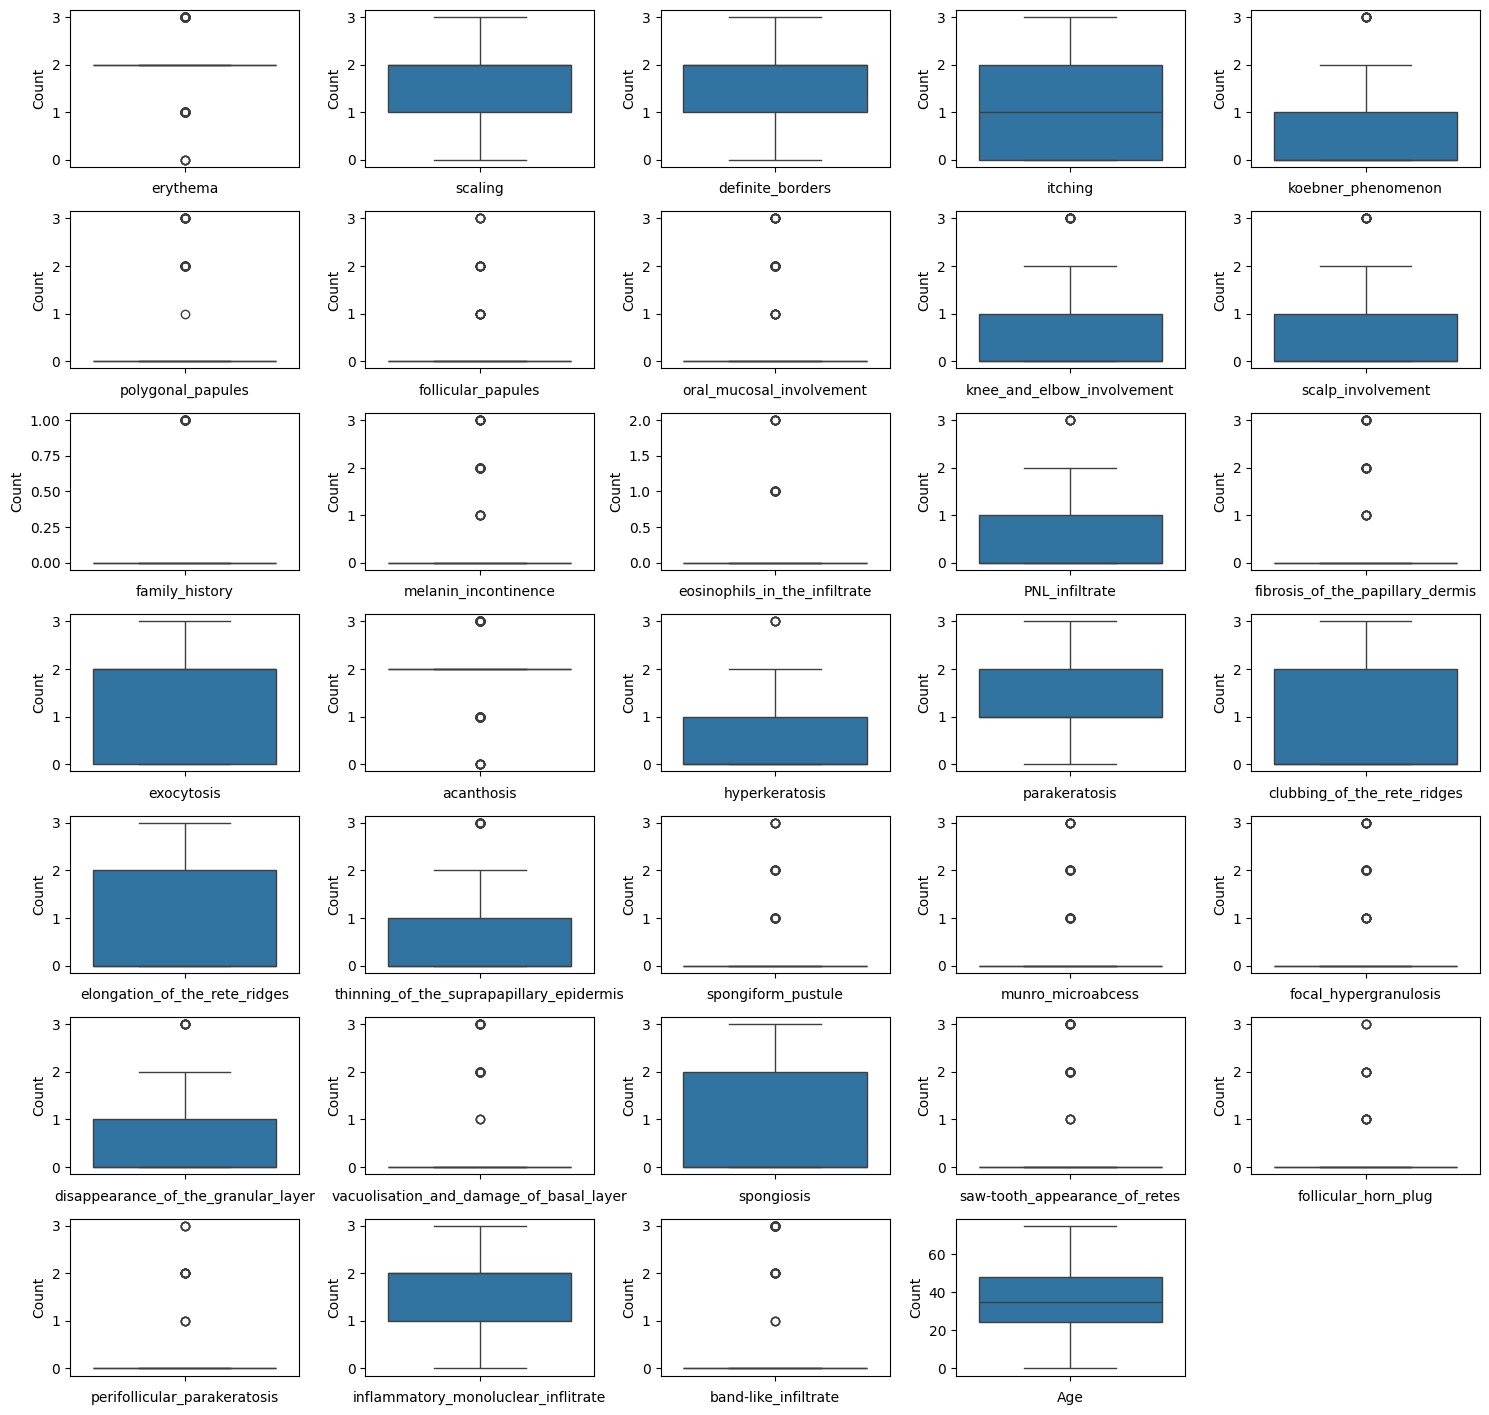

In [ ]:
#We can check for the outliers in all columns
plt.figure(figsize=(15,20))
plotnumber=1
for column in df.columns:
  if plotnumber<=34:
    ax=plt.subplot(10,5,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Count',fontsize=10)
    plt.tight_layout()
  plotnumber+=1
plt.show()

In [ ]:
df.value_counts()

erythema  scaling  definite_borders  itching  koebner_phenomenon  polygonal_papules  follicular_papules  oral_mucosal_involvement  knee_and_elbow_involvement  scalp_involvement  family_history  melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  spongiform_pustule  munro_microabcess  focal_hypergranulosis  disappearance_of_the_granular_layer  vacuolisation_and_damage_of_basal_layer  spongiosis  saw-tooth_appearance_of_retes  follicular_horn_plug  perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  band-like_infiltrate  Age  class
0         0        0                 0        0                   0                  0                   3                         0                           0                  0               1                     0                              0               0                                 3           1           1               1              0                            0                              0                                         0                   0                  2                      0                                    3                                        3           3                              0                     0                             3                                    3                     52   3        1
2         3        1                 2        1                   0                  0                   0                         0                           0                  0               0                     0                              2               0                                 0           1           0               0              2                            1                              2                                         2                   0                  0                      0                                    0                                        0           0                              0                     0                             2                                    0                     19   1        1
                   0                 3        0                   0                  0                   0                         0                           2                  0               0                     2                              2               0                                 2           3           0               3              0                            0                              0                                         0                   0                  0                      0                                    0                                        2           0                              0                     0                             2                                    0                     42   2        1
                                     2        0                   0                  0                   0                         0                           0                  0               0                     0                              2               0                                 3           3           0               0              0                            0                              0                                         0                   0                  0                      0                                    0                                        2           0                              0                     0                             2                                    0                     52   2        1
                                                                                                                                                                                         

In [ ]:
#The column Age needs to be scaled
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Age']=scaler.fit_transform(df[['Age']])

In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,1.215654,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,-1.714794,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,-0.592495,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,0.280404,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,0.592154,3


In [ ]:
#Use forloop to check unique() for all columns
for column in df.columns:
  print(df[column].unique())

[2 3 1 0]
[2 3 1 0]
[0 3 2 1]
[3 2 0 1]
[0 1 2 3]
[0 3 2 1]
[0 3 1 2]
[0 3 2 1]
[1 0 3 2]
[0 1 2 3]
[0 1]
[0 1 2 3]
[0 2 1]
[0 1 3 2]
[0 3 1 2]
[3 1 0 2]
[2 3 1 0]
[0 2 1 3]
[0 2 3 1]
[0 2 1 3]
[0 2 3 1]
[0 2 3 1]
[0 2 1 3]
[0 1 2 3]
[0 2 3 1]
[0 3 2 1]
[0 2 3 1]
[3 0 2 1]
[0 2 3 1]
[0 1 2 3]
[0 2 1 3]
[1 2 3 0]
[0 3 1 2]
[ 1.21565379 -1.71479415 -0.59249494  0.28040445  0.59215423  0.3427544
 -1.09129459  1.3403537  -0.84189476 -0.34309511 -0.96659468 -0.90424472
 -1.59009424  1.83915335  0.15570454 -0.77954481 -1.15364455  0.96625397
  0.40510436  0.52980427 -0.15604525  0.46745432  0.90390401 -0.09369529
 -2.2135938  -1.27834446  0.65450419  1.65210348 -0.03134533  0.7792041
 -1.46539433  1.02860392  1.52740357 -0.2183952  -1.02894463 -0.40544507
 -0.6548449   0.03100462 -1.40304437 -0.53014498 -0.28074516 -0.46779503
  1.7768034   0.21805449  0.71685414 -1.2159945  -1.77714411  2.15090313
  0.09335458  1.58975353  1.96385327  1.27800375  1.09095388 -0.71719485
  1.40270366  0.84155

In [ ]:
#Split data into x and y
x=df.drop('class',axis=1)
y=df['class']

In [ ]:
#Then we split data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#We use Decision Tree as base model
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier(max_depth=1)

In [ ]:
#We now import Adaboost model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
adaboost_model = AdaBoostClassifier(base_model, n_estimators=100, learning_rate=0.1, random_state=42)
#Lower the learning rate (e.g., 0.1 or 0.5).
#This reduces the impact of large sample weights caused by outliers.

In [ ]:
adaboost_model.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
y_pred = adaboost_model.predict(x_test)

In [ ]:
#Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9054054054054054
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.56      1.00      0.72         9
           3       1.00      1.00      1.00        13
           4       1.00      0.62      0.77         8
           5       1.00      1.00      1.00        10
           6       0.00      0.00      0.00         3

    accuracy                           0.91        74
   macro avg       0.76      0.77      0.75        74
weighted avg       0.91      0.91      0.89        74



##REPORT ANALYSIS

#Report Analysis

1. Feature Scaling: Since the SVM model is sensitive to feature scaling, ensuring that all numerical features are normalized or standardized can be challenging.

2. Algorithm Performance: Different machine learning models performed variably, requiring multiple iterations of hyperparameter tuning to optimize results.

3. Feature Selection: The dataset had numerous clinical and histopathological features. Identifying the most relevant features for the model without overfitting was challenging.

4. Algorithm Performance: Different machine learning models performed variably, requiring multiple iterations of hyperparameter tuning to optimize results.


#Better Model In Prediction
We have done 3 model prediction in this model. The three of the model predictions are

RandomForest.
Support Vector Machines.
AdaBoost


1. Random Forest:
F1-score (0.97).

2. Support Vector Machines:
F1-score (0.96)

3. AdaBoost
F1-score (0.75)

**ANALYSIS**



### **1. Random Forest**
- **F1-Score**: **0.97**
- **Strengths**:
  - Demonstrated consistent performance across all classes with near-perfect F1-scores.
  - Handles imbalanced datasets effectively, maintaining high precision and recall even for underrepresented classes.
  - Robust in capturing complex decision boundaries due to its ensemble nature.
- **Weaknesses**:
  - Slightly lower F1-scores for some classes (e.g., Class 2: 0.91, Class 4: 0.90) indicate potential for minor refinement with parameter tuning or feature engineering.

**Conclusion**: Best overall performer with minimal weaknesses, making it the most suitable model in this analysis.



### **2. Support Vector Machines (SVM)**
- **F1-Score**: **0.96**
- **Strengths**:
  - Consistently high F1-scores across all classes, closely matching Random Forest.
  - Excellent for high-dimensional data and performs well even with relatively small datasets.
- **Weaknesses**:
  - Slightly lower performance for some classes, such as Class 2 (F1: 0.88) and Class 4 (F1: 0.86).
  - May require more tuning (e.g., kernel choice, regularization) to match Random Forest's consistency.
  - Computationally intensive for larger datasets.

**Conclusion**: A strong alternative to Random Forest, particularly if interpretability or feature scaling are priorities.

---

### **3. AdaBoost**
- **F1-Score**: **0.75**
- **Strengths**:
  - High performance for certain classes (e.g., Classes 3 and 5, both with F1: 1.00).
  - Performs well when sufficient training data is available for all classes.
- **Weaknesses**:
  - Poor handling of minority classes, as seen with Class 6 (F1: 0.00).
  - Struggles with complex decision boundaries, leading to inconsistent recall and precision for some classes (e.g., Class 4: F1: 0.77).
  - Sensitive to outliers and imbalanced data.

**Conclusion**: Performs significantly worse than both Random Forest and SVM in terms of overall F1-score and class consistency. Improvements like balancing the dataset and hyperparameter tuning are essential.



### **Overall Recommendation**
1. **Random Forest**: Best choice for this dataset due to its superior F1-score, robustness, and consistency.
2. **SVM**: A close second, suitable when computational resources allow for its tuning or when interpretability is critical.
3. **AdaBoost**: Not recommended in its current form but could improve with further refinement and adjustments to handle class imbalances effectively.





##CONCLUSION

In this analysis, Random Forest emerged as the best-performing model with an F1-score of 0.97, showcasing exceptional consistency and robustness across all classes, making it the most suitable choice for this dataset. Support Vector Machines followed closely with an F1-score of 0.96, providing strong performance but showing slight weaknesses in a few classes, which could be addressed with additional tuning. AdaBoost, with a significantly lower F1-score of 0.75, struggled with class imbalances and underrepresented categories, indicating it is not the ideal choice in its current form. Overall, Random Forest is the recommended model for its superior handling of imbalanced data and consistent results.